# **Petrol Price Forecasting  using Tensor Flow and Auto Keras**

In [1]:
# Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.

# In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

# We will use LSTM and ARIMA forecasting models to predict the prices.

# Importing Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

from google.colab import drive
drive.mount('/content/drive')

df1 = pd.read_csv("/content/drive/MyDrive/Content/train_data.csv")
df1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [2]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [3]:
df2 = df1.dropna()

df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


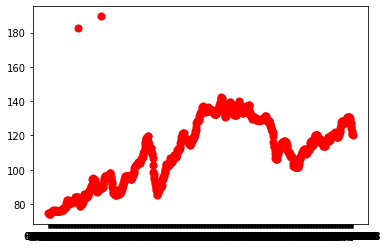

In [4]:
plt.scatter(df2.Date, df2.Petrol,color='red',label='Prices', s=50)

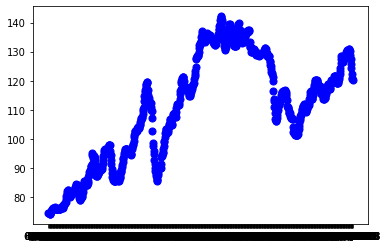

In [5]:
df3=df2[df2.Petrol<160]
plt.scatter(df3.Date, df3.Petrol,color='blue',label='Prices', s=50)

In [6]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df4=scaler.fit_transform(np.array(df4).reshape(-1,1))

df4

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [8]:
# **Data Analysis and splitting the data**

training_size=int(len(df4)*0.65)
test_size=len(df4)-training_size
train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

train_data.shape
test_data.shape

# **Data Preprocessing**

import numpy

# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train

y_train

print(X_train.shape), print(y_train.shape)

(424, 100)
(424,)


(None, None)

In [9]:
# LSTM 

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 [==============================] - 9s 468ms/step - loss: 0.1585 - val_loss: 0.0986
Epoch 2/100
7/7 [==============================] - 2s 217ms/step - loss: 0.0318 - val_loss: 0.0273
Epoch 3/100
7/7 [==============================] - 1s 212ms/step - loss: 0.0227 - val_loss: 0.0065
Epoch 4/100
7/7 [==============================] - 1s 217ms/step - loss: 0.0144 - val_loss: 0.0049
Epoch 5/100
7/7 [==============================] - 1s 211ms/step - loss: 0.0099 - val_loss: 0.0052
Epoch 6/100
7/7 [==============================] - 1s 210ms/step - loss: 0.0082 - val_loss: 0.0058
Epoch 7/100
7/7 [==============================] - 1s 213ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 8/100
7/7 [==============================] - 2s 218ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 9/100
7/7 [==============================] - 2s 220ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 10/100
7/7 [==============================] - 1s 216ms/step - loss: 0.0060 - val_loss: 0.0031
Epoch 11/

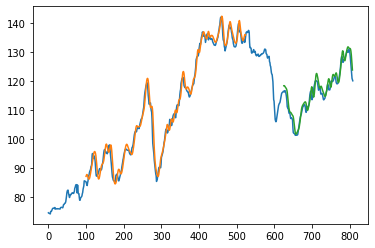

INFO:tensorflow:Assets written to: prtrol price prediction/assets


INFO:tensorflow:Assets written to: prtrol price prediction/assets


In [10]:
# Lets Do the prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

# Transformback to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# Plotting 
# shift train predictions for plotting

look_back=100
trainPredictPlot = numpy.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting

testPredictPlot = numpy.empty_like(df4)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

df_test=pd.read_csv("test_data.csv")
df_test.head()

model.save("prtrol price prediction")

In [11]:
# **Using ARIMA**

!pip install --upgrade patsy

!pip install statsmodels

!pip install --upgrade --no-deps statsmodels

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

df = pd.read_csv("/content/drive/MyDrive/Content/train_data.csv")

df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)

df2 = df.dropna()
df3=df2[df2.Petrol<160]

df4=df3.reset_index()['Petrol']

model1 = ARIMA(df4.values, order=(5,1,0))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=30)
output1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  del sys.path[0]


array([119.80670593, 119.5214334 , 119.30634678, 119.14818579,
       119.02925462, 118.93899181, 118.87071686, 118.81917589,
       118.78030407, 118.75097676, 118.72883977, 118.71212966,
       118.69951711, 118.68999785, 118.68281325, 118.67739062,
       118.67329782, 118.67020875, 118.66787724, 118.66611751,
       118.66478934, 118.6637869 , 118.66303029, 118.66245924,
       118.66202823, 118.66170292, 118.66145739, 118.66127208,
       118.66113221, 118.66102664])